# Raisin Classification

Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.
These dataset was obtained from the following website - https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset.

The objective is to come with a model which would help to classify the Kecimen and Besni raisin.


In [1]:
from __future__ import print_function

import os

data_path = ['Raisin_Dataset']

In [2]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Raisin_Dataset.csv'])
data = pd.read_csv(filepath, sep=',')

In [3]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
#check the shape of data
data.shape

(900, 8)

In [5]:
#check the type of data
data.dtypes.value_counts()

float64    5
int64      2
object     1
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
#Examine class and class imbalance
data['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [8]:
#checking for missing values
data.isnull().sum().sum()

0

In [9]:
#check for duplicated values
data.duplicated().sum()

0

<AxesSubplot:>

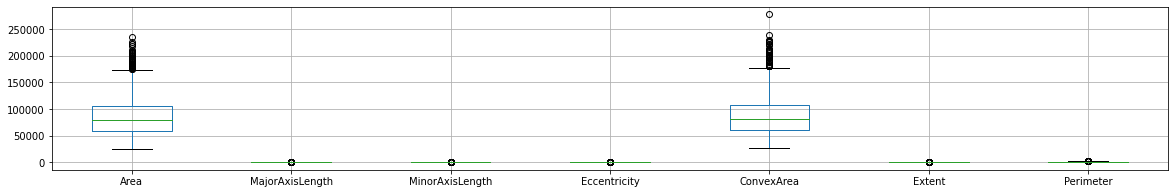

In [10]:
#check for data outliers
%matplotlib inline

data1 = data.drop(['Class'],axis=1)
data1.boxplot(figsize=(20,3))


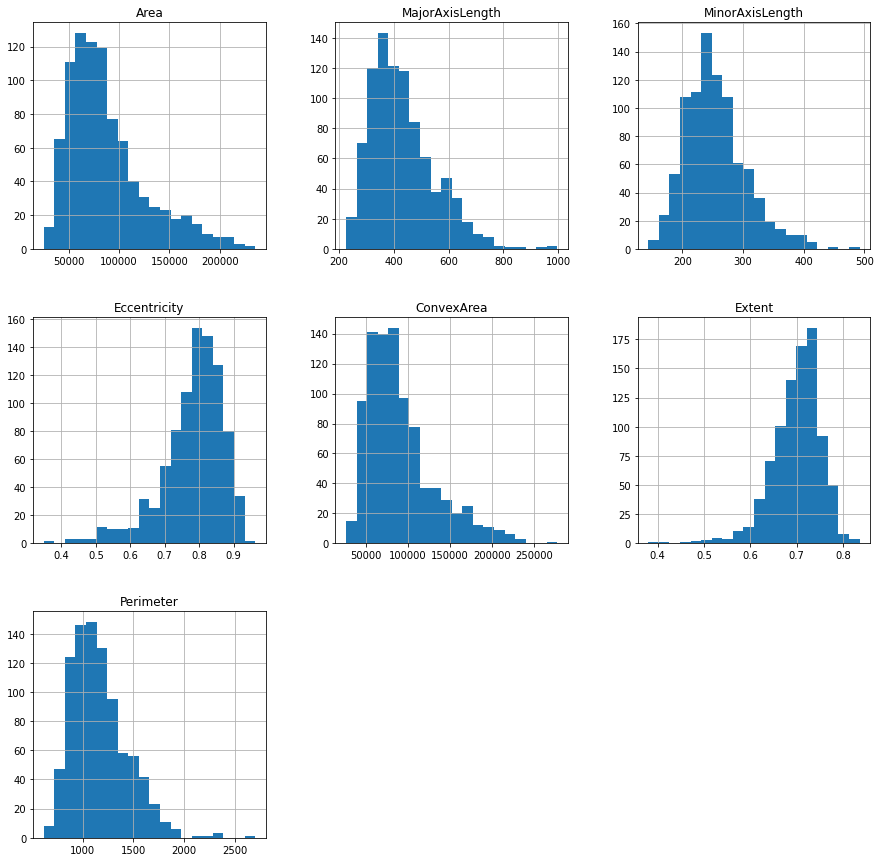

In [11]:
#check the distribution of each variable
import matplotlib.pyplot as plt
def plot_features_distribution(data):
 data.hist(bins=20, figsize=(15,15))
 plt.show()
    
plot_features_distribution(data)

In [12]:
#check whether scaling is required
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


scaling is required as the min & max value shows a wide range

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Class'] = le.fit_transform(data.Class)
data['Class'].sample(5)

874    0
502    0
585    0
192    1
897    0
Name: Class, dtype: int32

In [14]:
data.corr().abs()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,0.013499,0.961352,0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,0.203866,0.977978,0.673194
MinorAxisLength,0.906650,0.728030,1.000000,0.027683,0.895651,0.145322,0.827417,0.503102
Eccentricity,0.336107,0.583608,0.027683,1.000000,0.348210,0.361061,0.447845,0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,0.054802,0.976612,0.625567
Extent,0.013499,0.203866,0.145322,0.361061,0.054802,1.000000,0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,0.173449,1.000000,0.665981
Class,0.625715,0.673194,0.503102,0.438500,0.625567,0.154689,0.665981,1.000000


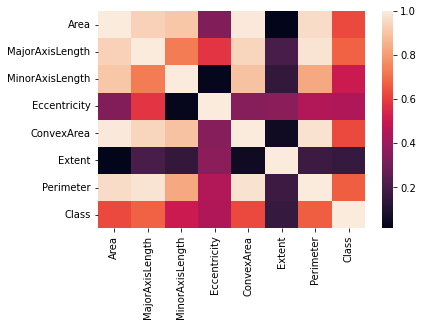

In [15]:
import seaborn as sns
#import matplotlib.pyplot as plt
sns.heatmap(data.corr().abs());

Based on the Correlation diagram, since most of the features does not show a very high correlation with the other feature. I would be using all the features for this analysis. Also there is only a small number of features available, hence PCA will not be required.

## Apply scaling

In [16]:
#use min maxscaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
print(scaler.fit(data))

MinMaxScaler()


In [17]:
data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791,1.0
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842,1.0
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594,1.0
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284,1.0
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493,1.0
...,...,...,...,...,...,...,...,...
895,0.275975,0.264945,0.298733,0.763836,0.236831,0.634192,0.245347,0.0
896,0.295540,0.278757,0.331595,0.749761,0.256905,0.563259,0.286325,0.0
897,0.354240,0.267056,0.445044,0.608017,0.317858,0.792897,0.324126,0.0
898,0.324983,0.324902,0.316915,0.810259,0.283698,0.612254,0.307635,0.0


In [18]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.297706,0.266050,0.317810,0.705602,0.258044,0.701609,0.263067,0.500000
std,0.186026,0.150370,0.143414,0.147244,0.161733,0.117358,0.131701,0.500278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.161981,0.155267,0.216317,0.640756,0.140331,0.638749,0.167095,0.000000
50%,0.255247,0.236080,0.298761,0.733812,0.220218,0.718859,0.240747,0.500000
75%,0.379859,0.348025,0.390682,0.805095,0.326235,0.779492,0.331612,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split data

In [19]:
#split data
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

feature_cols = data.columns[:-1]
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Class))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Class']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Class']

In [20]:
#returns object containing counts of unique values.
#normalize=True, returns the relative frequency 
y_train.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: Class, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: Class, dtype: float64

# Fit Model

#### Model1-Logistic Regression

In [22]:
from time import time
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
accuracies = {}

In [24]:
#model1
%time
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
#predicted the output by passing X_test and also stored real target in expected_y

expected_y  = y_test
predicted_y = model.predict(X_test)

#printed classification report and confusion matrix for the classifier
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

accuracies['LogisticRegression'] = metrics.accuracy_score(expected_y, predicted_y)

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       135
         1.0       0.80      0.90      0.85       135

    accuracy                           0.84       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.84      0.84      0.84       270

[[105  30]
 [ 14 121]]


In [26]:
#Model2 
#L1 regularized logistic regression
#https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iteration
#lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)


#### Model2-RandomForestClassifier

In [27]:
%time
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

CPU times: total: 0 ns
Wall time: 0 ns


C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.150794
20.0,0.144444
30.0,0.133333
40.0,0.128571
50.0,0.138095
100.0,0.130159
150.0,0.130159
200.0,0.134921
300.0,0.136508


The error looks like it has stabilized around 100-150 trees.

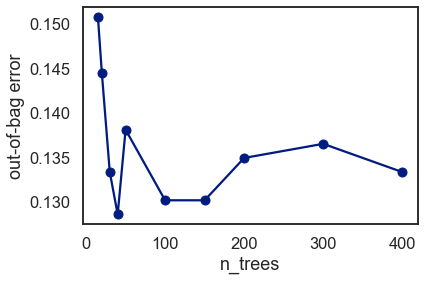

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');


In [29]:
# Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set.
# Random forest with 100 estimators
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

model = RF.set_params(n_estimators=100)

model.fit(X_train, y_train)

predicted_y = model.predict(X_test)

In [30]:
#printed classification report and confusion matrix for the classifier
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

accuracies['RandomForestClassifier'] = metrics.accuracy_score(expected_y, predicted_y)

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83       135
         1.0       0.81      0.89      0.85       135

    accuracy                           0.84       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.84      0.84      0.84       270

[[106  29]
 [ 15 120]]


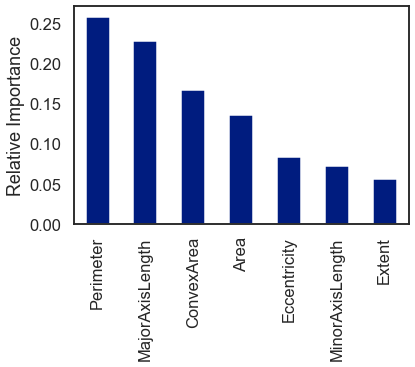

In [31]:
#The feature importances.
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

#### Model3 - XGBoost

In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#using XGBClassifier as a Machine Learning model to fit the data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

#predicted the output by passing X_test and also stored real target in expected_y
expected_y  = y_test
predicted_y = model.predict(X_test)

#printed classification report and confusion matrix for the classifier
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

accuracies['XGBClassifier'] = metrics.accuracy_score(expected_y, predicted_y)

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       135
         1.0       0.78      0.92      0.84       135

    accuracy                           0.83       270
   macro avg       0.84      0.83      0.83       270
weighted avg       0.84      0.83      0.83       270

[[100  35]
 [ 11 124]]


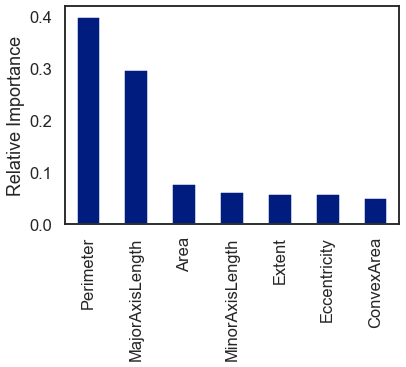

In [33]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

In [34]:
accuracies

{'LogisticRegression': 0.837037037037037,
 'RandomForestClassifier': 0.837037037037037,
 'XGBClassifier': 0.8296296296296296}

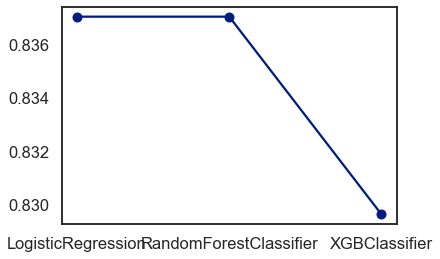

In [35]:
plt.plot(accuracies.keys(), accuracies.values(), '-o')